# Speckle aberration recovery

This is a python notebook

There is an equivalent for matlab

you can also run the python script `speckle_aberration_reconver.py`

Gautam Gunjala & Antoine Wojdyla, June 2020

In [1]:
import numpy as np

## physical paramaters

In [2]:
# physical paramaters

# wavelength
lambda_m = 13.5e-9

# pixel size
px_m = 15e-9

# numerical aperture
NA = 0.33/4

## load experimental data

In [3]:
from PIL import Image
#from os import getcwd

#folder = getcwd()+ "/../data/"
#os.path.sep
folder = "/Users/awojdyla/speckleAberrationRecovery/data/"

img = ()
N_img = 10
for i_f in np.arange(N_img):
    img_data = np.asarray(Image.open(folder+"SHARP-%02.0f"%i_f+".png"))
    img += (img_data,)

# illumination angles
sx = [+5.000e-02, +0.000e+00, -2.000e-01, +0.000e+00, +2.000e-01, -2.000e-01, +2.000e-01, -2.000e-01, +0.000e+00, +2.000e-01]
sy = [+0.000e+00, +0.000e+00, -2.000e-01, -2.000e-01, -2.000e-01, +0.000e+00, +0.000e+00, +2.000e-01, +2.000e-01, +2.000e-01]

In [4]:
# alternative method to read data
import h5py
from os import getcwd
folder = getcwd()+ "/../data/"
filename = "speckle_data.hdf5"
filepath = "/Users/awojdyla/speckleAberrationRecovery/data/speckle_data.hdf5"
f_data = h5py.File(filepath, 'r')

img = ()
sx = ()
sy = ()
N_img = 10
for i_f in np.arange(N_img):
    img_data = np.transpose(np.asarray(f_data['image%02.0f'%(i_f+1)+'/data']))
    sx_data  = np.asarray(f_data['image%02.0f'%(i_f+1)+'/sx'])
    sy_data  = np.asarray(f_data['image%02.0f'%(i_f+1)+'/sy'])
    img += (img_data,)
    sx += (sx,)
    sy += (sy,)

In [5]:
# display data
import matplotlib.pyplot as plt

#image index
i_f = 1

#image scaing
Dx_m = 2048*px_m

plt.imshow(img[i_f], 
           extent=(-Dx_m/2*1e6,+Dx_m/2*1e6,-Dx_m/2*1e6,+Dx_m/2*1e6 ),
           cmap=plt.get_cmap('gray'))
plt.title('image %2.0f'%i_f)
plt.xlabel('position [um]')
plt.ylabel('position [um]')
plt.colorbar()
plt.show()

<Figure size 640x480 with 2 Axes>

## Pre-process data

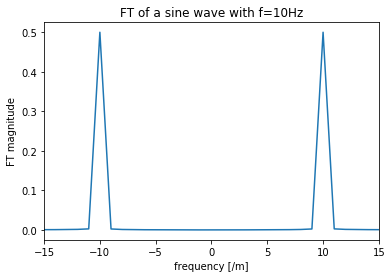

In [6]:
# frequency scale
fs  = lambda t: (np.arange(0,1/(t[1]-t[0]),1/((t[1]-t[0])*len(t)))) - (1/(t[1]-t[0])-np.mod(len(t),2)*1/((t[1]-t[0])*len(t)))/2
#fs  = lambda t: (np.arange(0,1/(t[1]-t[0])-1/((t[1]-t[0])*len(t)),1/((t[1]-t[0])*len(t)))) - (1/(t[1]-t[0])-np.mod(len(t),2)*1/((t[1]-t[0])*len(t)))/2
# centered Fourier transform
ft  =  lambda img: np.fft.fftshift( np.fft.ifft2( np.fft.ifftshift( img ) ) )
# centered inverse Fourier transform
ift = lambda IMG:  np.fft.fftshift(  np.fft.fft2( np.fft.ifftshift( IMG ) ) )

# testing helper function (to make sure there's no index error...)
x_s = np.arange(0,1,0.001)
f0_Hz = 10
s = np.sin(2*3.14*f0_Hz*x_s)
#S = ft(s)
f_cpm = fs(x_s)
S = ft(np.reshape(s,(1000,1)))
plt.plot(f_cpm, np.abs(S))
plt.title('FT of a sine wave with f=10Hz')
plt.xlabel('frequency [/m]')
plt.ylabel('FT magnitude')
plt.xlim((-15,15))
plt.show()

In [7]:
# whitening 



let's go!

## Extract aberration

In [8]:
# display results